## Creating CNN Using Scratch And Transfer Learning

Please download the dataset from the below url

In [3]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [25]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'cell_images/Train'
valid_path = 'cell_images/Test'


In [26]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

mobilnet = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [27]:
# don't train existing weights
for layer in mobilnet.layers:
    layer.trainable = False

In [44]:
  # useful for getting number of output classes
folders = glob('/content/drive/My Drive/Dataset/Train/*')
#folders=2

In [45]:
folders

['/content/drive/My Drive/Dataset/Train/Parasite',
 '/content/drive/My Drive/Dataset/Train/Uninfected']

In [39]:
# our layers - you can add more if you want
x = Flatten()(mobilnet.output)

In [46]:
prediction = Dense(len(folders), activation='softmax')(x)
#prediction = Dense((folders), activation='softmax')(x)
# create a model object
model = Model(inputs=mobilnet.input, outputs=prediction)

In [52]:

# view the structure of the model
model.summary()


Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [18]:
from tensorflow.keras.layers import MaxPooling2D

In [ ]:
### Create Model from scratch using CNN
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 50176)            

In [53]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [34]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [42]:
# Make sure you provide the same target size as initialied for the image size

training_set = train_datagen.flow_from_directory('/content/drive/My Drive/Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [49]:
training_set

In [48]:
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [56]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10, ## Reducing epocs to save time, Should try with 50 epoch for better results
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10
13/13 [==============================] - 361s 28s/step - loss: 0.9621 - accuracy: 0.6274 - val_loss: 0.7033 - val_accuracy: 0.6791
Epoch 2/10
13/13 [==============================] - 350s 27s/step - loss: 0.6407 - accuracy: 0.6947 - val_loss: 0.7087 - val_accuracy: 0.6716
Epoch 3/10
13/13 [==============================] - 351s 27s/step - loss: 0.4264 - accuracy: 0.8029 - val_loss: 0.5994 - val_accuracy: 0.7015
Epoch 4/10
13/13 [==============================] - 351s 27s/step - loss: 0.3440 - accuracy: 0.8293 - val_loss: 0.4316 - val_accuracy: 0.8060
Epoch 5/10
13/13 [==============================] - 350s 27s/step - loss: 0.2994 - accuracy: 0.8894 - val_loss: 0.3809 - val_accuracy: 0.8209
Epoch 6/10
13/13 [==============================] - 349s 27s/step - loss: 0.2683 - accuracy: 0.9014 - val_loss: 0.3848 - val_accuracy: 0.8358
Epoch 7/10
13/13 [==============================] - 349s 27s/step - loss: 0.2665 - accuracy: 0.9111 - val_loss: 0.3578 - val_accuracy: 0.8731
Epoch 

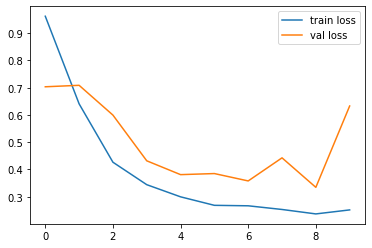

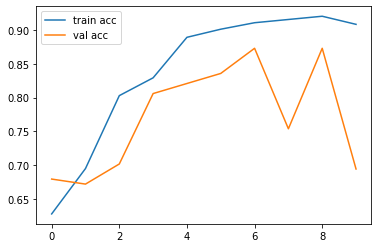

<Figure size 432x288 with 0 Axes>

In [57]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [58]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

In [59]:

y_pred = model.predict(test_set)


In [60]:
y_pred

array([[2.23308682e-01, 7.76691318e-01],
       [9.10761476e-01, 8.92385393e-02],
       [9.44213420e-02, 9.05578673e-01],
       [5.70933580e-01, 4.29066390e-01],
       [4.10000011e-02, 9.58999991e-01],
       [4.24061358e-01, 5.75938642e-01],
       [7.57805780e-02, 9.24219370e-01],
       [5.10275587e-02, 9.48972464e-01],
       [8.80366683e-01, 1.19633391e-01],
       [2.90146321e-02, 9.70985413e-01],
       [9.86292839e-01, 1.37071488e-02],
       [2.03569368e-01, 7.96430647e-01],
       [5.83123043e-02, 9.41687703e-01],
       [2.27470264e-01, 7.72529721e-01],
       [2.38242939e-01, 7.61757076e-01],
       [5.54920770e-02, 9.44507897e-01],
       [8.73785138e-01, 1.26214832e-01],
       [9.82468605e-01, 1.75313503e-02],
       [1.20719247e-01, 8.79280746e-01],
       [2.76817471e-01, 7.23182559e-01],
       [5.18153191e-01, 4.81846839e-01],
       [9.86666143e-01, 1.33338394e-02],
       [5.15605092e-01, 4.84394908e-01],
       [7.33328938e-01, 2.66671002e-01],
       [4.337775

In [61]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [62]:
y_pred

array([1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1])

In [63]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [64]:
model=load_model('model_vgg19.h5')

In [65]:
img=image.load_img('/content/drive/My Drive/Dataset/Test/Uninfected/2.png',target_size=(224,224))



In [66]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [67]:
x.shape

(224, 224, 3)

In [68]:
x=x/255

In [69]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [70]:
model.predict(img_data)

array([[0.01446233, 0.9855377 ]], dtype=float32)

In [71]:
a=np.argmax(model.predict(img_data), axis=1)

In [72]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Uninfected
